
#*STM calculation for CR3BP*

##*Code by: Simón Patiño*



In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

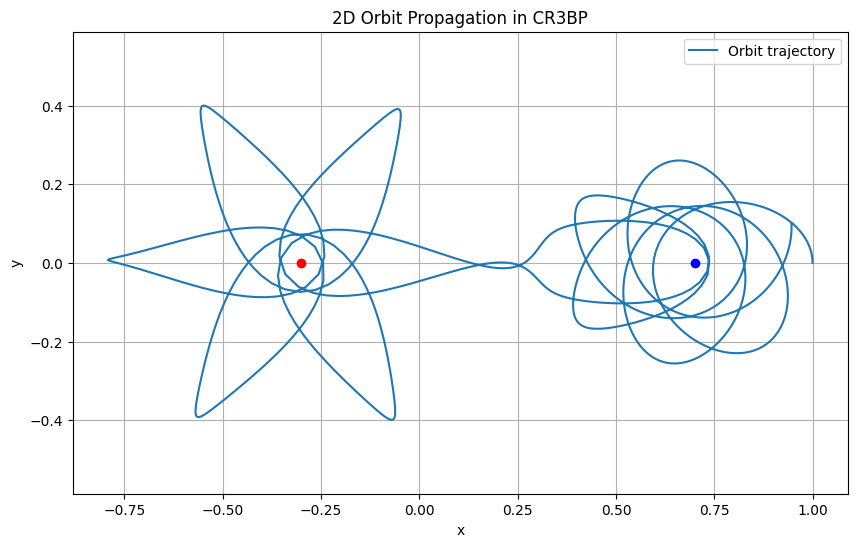

In [ ]:
def ecuaciones_crtbp(Ys, t, alfa):
    dYdt = np.zeros_like(Ys)

    # Unpack the state vector
    x, y, z, vx, vy, vz = Ys[:6]
    stm = Ys[6:].reshape(6, 6)

    # Calculate distances
    r1 = np.sqrt((x + alfa)**2 + y**2 + z**2) #Eq.39
    r2 = np.sqrt((x + alfa - 1)**2 + y**2 + z**2) #Eq.40

    # Equations of motion
    dYdt[0] = vx
    dYdt[1] = vy
    dYdt[2] = vz
    dYdt[3] = -(1 - alfa)*(x + alfa)/r1**3 - alfa*(x + alfa - 1)/r2**3 + x + 2*vy #Eq.42
    dYdt[4] = -(1 - alfa)*y/r1**3 - alfa*y/r2**3 + y - 2*vx #Eq.43
    dYdt[5] = -(1 - alfa)*z/r1**3 - alfa*z/r2**3 #Eq.44

    # Define the U matrix for STM propagation using the updated equations
    Uxx = 1 - (1 - alfa)/r1**3 - alfa/r2**3 + 3*((x + alfa)**2)*(1 - alfa)/r1**5 + 3*((x + alfa - 1))*alfa/r2**5 #Eq.49
    Uyy = 1 - (1 - alfa)/r1**3 - alfa/r2**3 + 3*y**2*(1 - alfa)/r1**5 + 3*y**2*alfa/r2**5 #Eq.50
    Uzz = -(1 - alfa)/r1**3 - alfa/r2**3 + 3*z**2*(1 - alfa)/r1**5 + 3*z**2*alfa/r2**5 #Eq.51

    Uxy = 3*y*( (x + alfa)*(1 - alfa)/r1**5 + (x + alfa - 1)*alfa/r2**5 )#Eq.52
    Uxz = 3*z*( (x + alfa)*(1 - alfa)/r1**5 + (x + alfa - 1)*alfa/r2**5 )#Eq.53
    Uyz = 3*y*z*( (1 - alfa)/r1**5 + alfa/r2**5 )#Eq.54

    A = np.array([          #Eq.46
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [Uxx, Uxy, Uxz, 0, 2, 0],
        [Uxy, Uyy, Uyz, -2, 0, 0],
        [Uxz, Uyz, Uzz, 0, 0, 0]
    ])

    # STM propagation equation
    dSTMdt = A @ stm  #Eq.14

    # Pack the derivatives into a single vector
    dYdt[6:] = dSTMdt.flatten()

    return dYdt

# Initial conditions for the state and STM (identity matrix)
initial_state = np.array([1, 0, 0, 0 ,0.45,0])  # Example initial conditions
initial_stm = np.identity(6).flatten()  #Eq.56

initial_conditions = np.concatenate([initial_state, initial_stm])

# Define the time span for the integration
t_span = (0, 15)  # Example time span (initial time and final time to integrate)


ts = np.linspace(t_span[0], t_span[1], 1500)  # Times at which to store the computed values

# Define the CR3BP parameters
alfa = 0.3

# Integrate the system using odeint
solution = odeint(ecuaciones_crtbp, initial_conditions, ts, args=(alfa,))

# Extract the results
positions = solution[:, :3]  # x, y, z positions
velocities = solucion[:, 3:6]  # vx, vy, vz velocities
stms = solution[:, 6:].reshape(-1, 6, 6)  # STM matrices

# Plot the 2D orbit (x, y)
plt.figure(figsize=(10, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Orbit trajectory')
plt.plot(-alfa,0,'ro')
plt.plot(1-alfa,0,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Orbit Propagation in CR3BP')
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()

# Example usage of getSTM at a specific time

def getSTM(time):
    idx = np.searchsorted(ts, time)
    if idx >= len(ts):
        return None
    return stms[idx]

# Get the STM at time t = 5
stm_at_t5 = getSTM(5)

In [ ]:
print("List with ALL STMs for each instant of time", stms)

List with ALL STMs for each instant of time [[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e+00]]

 [[ 1.00509340e+00  4.92468375e-06  0.00000000e+00  1.00229881e-02
    1.00248459e-04  0.00000000e+00]
  [-2.55451307e-05  9.99477846e-01  0.00000000e+00 -1.00164280e-04
    1.00042613e-02  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  9.99427751e-01  0.00000000e+00
    0.00000000e+00  1.00047621e-02]
  [ 1.01895309e+00  1.47698

In [ ]:
getSTM(0) #get the matrix for a specific time
          #time 0 should be the identity

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(getSTM(0))

print("Valores propios:", eigenvalues)
print("Vectores propios:\n", eigenvectors)

Valores propios: [1. 1. 1. 1. 1. 1.]
Vectores propios:
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
